<a href="https://colab.research.google.com/github/Tchuissi/Tchuissi_DATA606/blob/main/ipynb/Final606.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**

##**1.Read the data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
# Read the first dataset

df1 = pd.read_csv("residential.csv")
df1.head()

,SSL,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,NUM_UNITS,ROOMS,BEDRM,AYB,...,ROOF,ROOF_D,INTWALL,INTWALL_D,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,OBJECTID
0,0028 0820,2.0,1.0,13.0,Hot Water Rad,Y,4.0,8.0,4.0,1905.0,...,2.0,Built Up,6.0,Hardwood,1.0,0.0,24,1242,2022/02/18 05:17:55+00,59113722
1,0028 0821,1.0,1.0,8.0,Ht Pump,Y,1.0,6.0,3.0,1911.0,...,2.0,Built Up,6.0,Hardwood,1.0,1.0,11,836,2022/02/18 05:17:55+00,59113723
2,0028 0829,3.0,0.0,8.0,Ht Pump,Y,2.0,10.0,4.0,1935.0,...,2.0,Built Up,6.0,Hardwood,2.0,0.0,24,1833,2022/02/18 05:17:55+00,59113724
3,0028 0850,1.0,0.0,1.0,Forced Air,Y,1.0,4.0,2.0,1953.0,...,2.0,Built Up,6.0,Hardwood,1.0,1.0,11,633,2022/02/18 05:17:55+00,59113725
4,0028 0854,2.0,0.0,7.0,Warm Cool,Y,1.0,6.0,2.0,1953.0,...,2.0,Built Up,6.0,Hardwood,1.0,1.0,11,600,2022/02/18 05:17:55+00,59113726


## **2.Drop unnecessary columns**

In [3]:
# Drop columns

df1 =df1.drop(['HF_BATHRM','AC','NUM_UNITS','AYB','YR_RMDL','EYB','QUALIFIED','SALE_NUM','BLDG_NUM','STYLE','STYLE_D','KITCHENS','FIREPLACES','USECODE','LANDAREA','GIS_LAST_MOD_DTTM','OBJECTID','GRADE','GRADE_D','CNDTN','CNDTN_D'], axis=1)
df1.head()

,SSL,BATHRM,HEAT,HEAT_D,ROOMS,BEDRM,STORIES,SALEDATE,PRICE,GBA,STRUCT,STRUCT_D,EXTWALL,EXTWALL_D,ROOF,ROOF_D,INTWALL,INTWALL_D
0,0028 0820,2.0,13.0,Hot Water Rad,8.0,4.0,2.0,2021/09/03 00:00:00+00,1225000.0,1742,7.0,Row Inside,14.0,Common Brick,2.0,Built Up,6.0,Hardwood
1,0028 0821,1.0,8.0,Ht Pump,6.0,3.0,2.0,2019/09/05 00:00:00+00,882500.0,1132,7.0,Row Inside,14.0,Common Brick,2.0,Built Up,6.0,Hardwood
2,0028 0829,3.0,8.0,Ht Pump,10.0,4.0,3.0,2005/01/12 00:00:00+00,1250000.0,2284,6.0,Row End,14.0,Common Brick,2.0,Built Up,6.0,Hardwood
3,0028 0850,1.0,1.0,Forced Air,4.0,2.0,2.0,2011/03/25 00:00:00+00,0.0,702,6.0,Row End,14.0,Common Brick,2.0,Built Up,6.0,Hardwood
4,0028 0854,2.0,7.0,Warm Cool,6.0,2.0,2.0,2021/11/03 00:00:00+00,780000.0,648,7.0,Row Inside,14.0,Common Brick,2.0,Built Up,6.0,Hardwood


We keep the following columns:
- Short sale listing (SSl) like ID
- Number of bathrooms
- Number of rooms
- Number of bedrooms
- Number of stories
- Gross building are (GBA)
- House Structure 
- Exterior wall type
- Interior wall type
- Roof type
- Heat type
- Sale Date
- Price

## **3.Handling missing values**

In [4]:
df1.shape

(108229, 18)

In [5]:
# remove all the rows that contain a missing value
df1 = df1.dropna()
df1.shape

(92056, 18)

The dataset has now 92,056 rows instead of 108,229 initially

## **4.Variables frequency**

### **4.1 Heat type**

In [6]:
df2 = df1.groupby(['HEAT', 'HEAT_D']).size().reset_index(name='Freq')
print (df2)

    HEAT          HEAT_D   Freq
0    0.0         No Data     37
1    1.0      Forced Air  32932
2    2.0         Air-Oil     72
3    3.0    Wall Furnace    169
4    4.0    Electric Rad     57
5    5.0   Elec Base Brd    112
6    6.0  Water Base Brd    152
7    7.0       Warm Cool  23010
8    8.0         Ht Pump   1488
9    9.0        Evp Cool     26
10  10.0      Air Exchng     29
11  11.0  Gravity Furnac     86
12  12.0        Ind Unit     15
13  13.0   Hot Water Rad  33871


In [7]:
df21 = df1[["HEAT_D","PRICE"]].groupby('HEAT_D').agg(
    TOTAL_SALES=pd.NamedAgg("PRICE", "count"),
    MAX_PRICE=pd.NamedAgg("PRICE", "max"),
    MEAN_PRICE=pd.NamedAgg("PRICE", "mean")
)

df21=df21.sort_values(by="TOTAL_SALES", ascending=False)
df21=df21.reset_index()
df21=df21.head(15)

df21

,HEAT_D,TOTAL_SALES,MAX_PRICE,MEAN_PRICE
0,Hot Water Rad,33871,11111111.0,3.451459e+05
1,Forced Air,32932,25100000.0,4.910468e+05
2,Warm Cool,23010,23960287.0,5.010800e+05
3,Ht Pump,1488,23960287.0,1.184940e+06
4,Wall Furnace,169,1800000.0,2.621401e+05
5,Water Base Brd,152,3400000.0,4.462900e+05
6,Elec Base Brd,112,4980000.0,4.576830e+05
7,Gravity Furnac,86,1200000.0,2.583185e+05
8,Air-Oil,72,1275000.0,2.643509e+05
9,Electric Rad,57,1365000.0,2.132403e+05


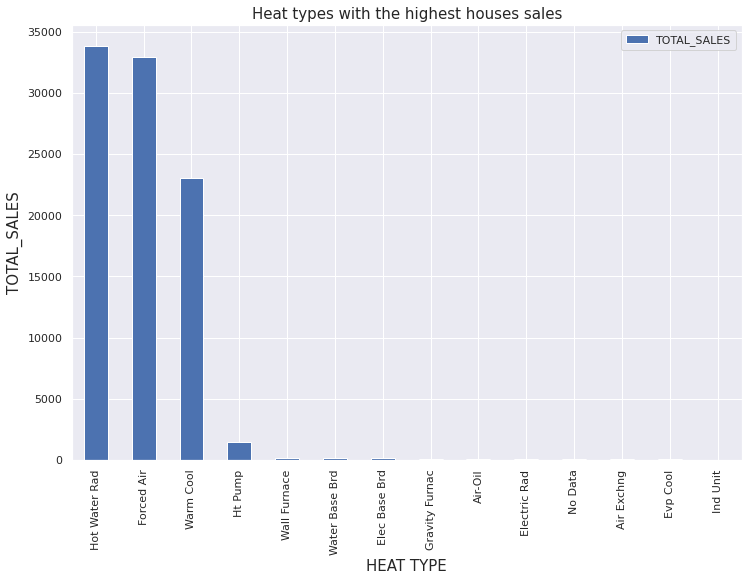

In [21]:
# Visualize the dataset

ax = df21.plot.bar(
    x="HEAT_D", 
    y="TOTAL_SALES",
    #title= "Heat types with the highest houses sales",
    legend=True,
    figsize=(12,8),
  
)
ax.set_title("Heat types with the highest houses sales", fontsize=15)
ax.set_xlabel("HEAT TYPE", fontsize=15)
ax.set_ylabel("TOTAL_SALES", fontsize=15)

plt.show()

The three most common heat type are:
- Hot Water Rad (36.8%)
- Forced Air (35.8%)
- Warm Cool (25%)


### **4.2 House structure**

In [22]:
df3 = df1.groupby(['STRUCT', 'STRUCT_D']).size().reset_index(name='Freq')
print (df3)


   STRUCT       STRUCT_D   Freq
0     0.0        No Data     16
1     1.0         Single  27063
2     2.0          Multi   4120
3     4.0       Town End     88
4     5.0    Town Inside    234
5     6.0        Row End  10810
6     7.0     Row Inside  35806
7     8.0  Semi-Detached  13919


In [23]:
df31 = df1[["STRUCT_D","PRICE"]].groupby('STRUCT_D').agg(
    TOTAL_SALES=pd.NamedAgg("PRICE", "count"),
    MAX_PRICE=pd.NamedAgg("PRICE", "max"),
    MEAN_PRICE=pd.NamedAgg("PRICE", "mean")
)

df31=df31.sort_values(by="TOTAL_SALES", ascending=False)
df31=df31.reset_index()
df31=df31.head(15)

df31

,STRUCT_D,TOTAL_SALES,MAX_PRICE,MEAN_PRICE
0,Row Inside,35806,7000000.0,4.489099e+05
1,Single,27063,23960287.0,5.517991e+05
2,Semi-Detached,13919,23960287.0,2.924453e+05
3,Row End,10810,11984000.0,4.434164e+05
4,Multi,4120,25100000.0,3.353705e+05
5,Town Inside,234,3700000.0,4.488158e+05
6,Town End,88,1230000.0,4.227002e+05
7,No Data,16,25000000.0,2.756906e+06


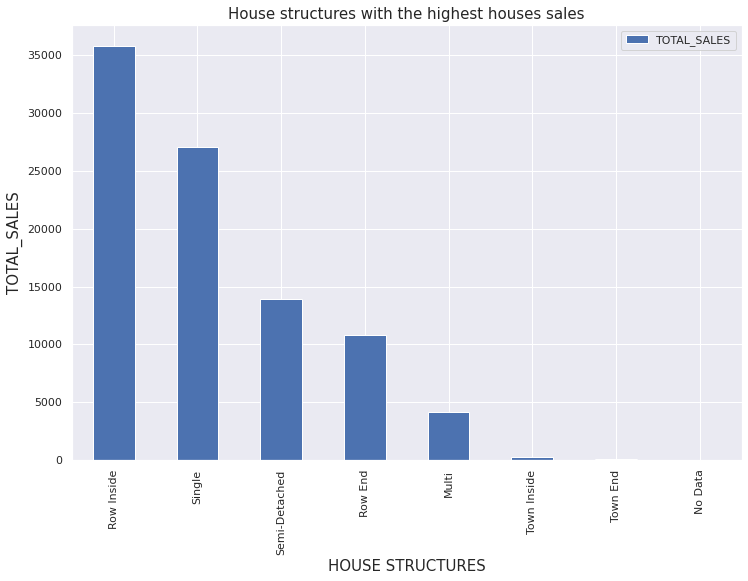

In [24]:
# Visualize the dataset

ax = df31.plot.bar(
    x="STRUCT_D", 
    y="TOTAL_SALES",
    #title= "House structures with the highest houses sales",
    legend=True,
    figsize=(12,8),
  
)
ax.set_title("House structures with the highest houses sales", fontsize=15)
ax.set_xlabel("HOUSE STRUCTURES", fontsize=15)
ax.set_ylabel("TOTAL_SALES", fontsize=15)

plt.show()

The three most common house structures are:
- Row houses (50.6%)
- Single houses (29.4%)
- Semi-detached houses (15%)

### **4.3 Exterior walls type**

In [25]:
df5 = df1.groupby(['EXTWALL', 'EXTWALL_D']).size().reset_index(name='Freq')
print (df5)

    EXTWALL       EXTWALL_D   Freq
0       0.0         No Data     15
1       1.0         Plywood     10
2       2.0       Hardboard    146
3       3.0    Metal Siding     68
4       4.0    Vinyl Siding   5013
5       5.0          Stucco   2713
6       6.0     Wood Siding   3786
7       7.0         Shingle    935
8       8.0        SPlaster      2
9      10.0    Brick Veneer    877
10     11.0    Stone Veneer    223
11     12.0  Concrete Block     47
12     13.0    Stucco Block     44
13     14.0    Common Brick  69194
14     15.0      Face Brick    603
15     16.0           Adobe      2
16     17.0           Stone    615
17     18.0        Concrete     71
18     19.0        Aluminum    772
19     20.0     Brick/Stone    557
20     21.0    Brick/Stucco    600
21     22.0    Brick/Siding   5218
22     23.0    Stone/Stucco    218
23     24.0    Stone/Siding    327


In [26]:
df51 = df1[["EXTWALL_D","PRICE"]].groupby('EXTWALL_D').agg(
    TOTAL_SALES=pd.NamedAgg("PRICE", "count"),
    MAX_PRICE=pd.NamedAgg("PRICE", "max"),
    MEAN_PRICE=pd.NamedAgg("PRICE", "mean")
)

df51=df51.sort_values(by="TOTAL_SALES", ascending=False)
df51=df51.reset_index()
df51=df51.head(15)

df51

,EXTWALL_D,TOTAL_SALES,MAX_PRICE,MEAN_PRICE
0,Common Brick,69194,23960287.0,4.388424e+05
1,Brick/Siding,5218,6500000.0,4.134931e+05
2,Vinyl Siding,5013,25100000.0,2.804531e+05
3,Wood Siding,3786,5850000.0,5.678403e+05
4,Stucco,2713,16500000.0,6.438195e+05
5,Shingle,935,5050000.0,3.672166e+05
6,Brick Veneer,877,7750000.0,6.241614e+05
7,Aluminum,772,7576980.0,2.691793e+05
8,Stone,615,15000000.0,9.011247e+05
9,Face Brick,603,2999000.0,5.053520e+05


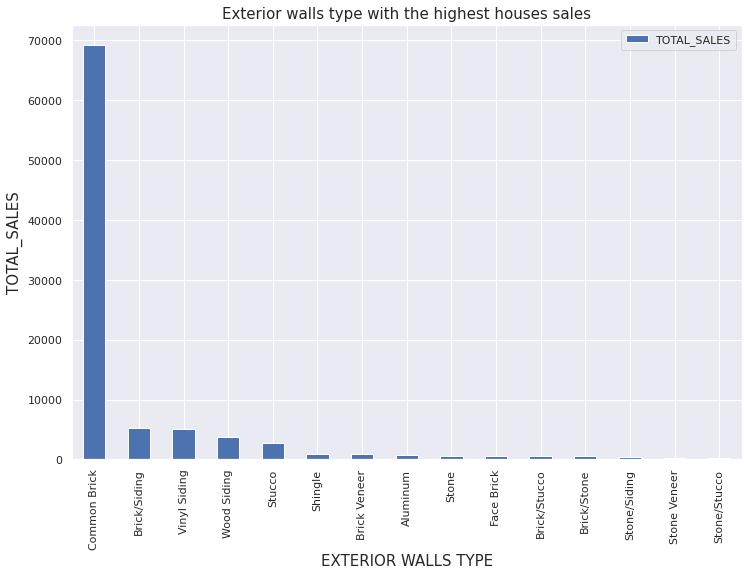

In [27]:
# Visualize the dataset

ax = df51.plot.bar(
    x="EXTWALL_D", 
    y="TOTAL_SALES",
    title= "Exterior walls type with the highest houses sales",
    legend=True,
    figsize=(12,8),
  
)
ax.set_title("Exterior walls type with the highest houses sales", fontsize=15)
ax.set_xlabel("EXTERIOR WALLS TYPE", fontsize=15)
ax.set_ylabel("TOTAL_SALES", fontsize=15)

plt.show()

The five common exterior walls are: 92056
- Common brick (75%)
- Brick/Siding (5.7%)
- Vinyl Siding (5.4%)
- Wood Siding (4.1%)
- Stucco (2.9%)

### **4.4 Interior walls type**

In [28]:
df8 = df1.groupby(['INTWALL', 'INTWALL_D']).size().reset_index(name='Freq')
print (df8)

    INTWALL      INTWALL_D   Freq
0       0.0        No Data     82
1       1.0      Resiliant     14
2       2.0         Carpet   2994
3       3.0     Wood Floor   6544
4       4.0   Ceramic Tile     49
5       5.0        Terrazo     25
6       6.0       Hardwood  72116
7       7.0        Parquet     16
8       8.0     Vinyl Comp     29
9       9.0    Vinyl Sheet     13
10     10.0    Lt Concrete     99
11     11.0  Hardwood/Carp  10075


In [29]:
df81 = df1[["INTWALL_D","PRICE"]].groupby('INTWALL_D').agg(
    TOTAL_SALES=pd.NamedAgg("PRICE", "count"),
    MAX_PRICE=pd.NamedAgg("PRICE", "max"),
    MEAN_PRICE=pd.NamedAgg("PRICE", "mean")
)

df81=df81.sort_values(by="TOTAL_SALES", ascending=False)
df81=df81.reset_index()
df81=df81.head(15)

df81

,INTWALL_D,TOTAL_SALES,MAX_PRICE,MEAN_PRICE
0,Hardwood,72116,23960287.0,4.718252e+05
1,Hardwood/Carp,10075,25100000.0,4.132899e+05
2,Wood Floor,6544,7600000.0,3.448427e+05
3,Carpet,2994,11000000.0,2.301481e+05
4,Lt Concrete,99,1660000.0,2.257273e+05
5,No Data,82,25000000.0,6.733230e+05
6,Ceramic Tile,49,1975000.0,5.273469e+05
7,Vinyl Comp,29,3280002.0,1.497534e+06
8,Terrazo,25,23000000.0,5.622204e+06
9,Parquet,16,2090000.0,5.096744e+05


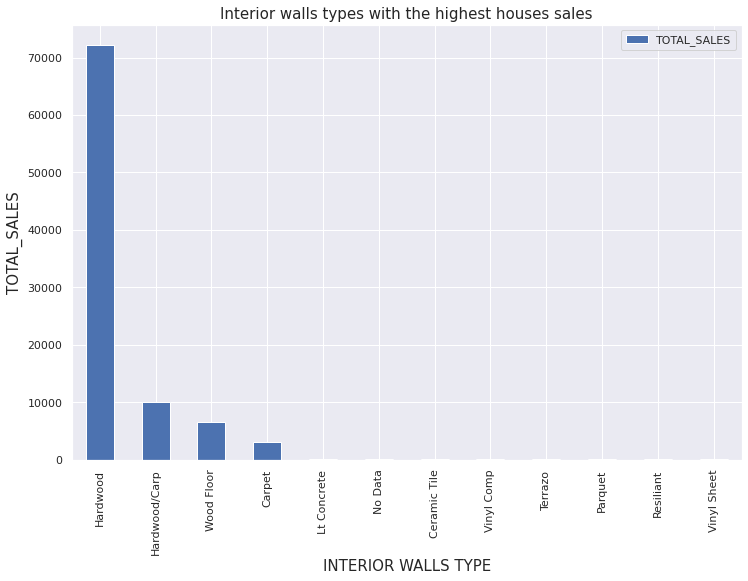

In [31]:
# Visualize the dataset

ax = df81.plot.bar(
    x="INTWALL_D", 
    y="TOTAL_SALES",
    title= "Interior walls types with the highest houses sales",
    legend=True,
    figsize=(12,8),
  
)
ax.set_title("Interior walls types with the highest houses sales", fontsize=15)
ax.set_xlabel("INTERIOR WALLS TYPE", fontsize=15)
ax.set_ylabel("TOTAL_SALES", fontsize=15)

plt.show()

The four common interior walls are:
- Hardwood (78.3%)
- Hardwood/carp (10.9%)
- Wood floor (7.1%)
- Carpet (3.3%)

### **4.5 Roof type**

In [32]:
df7 = df1.groupby(['ROOF', 'ROOF_D']).size().reset_index(name='Freq')
print (df7)

    ROOF          ROOF_D   Freq
0    0.0         Typical    185
1    1.0    Comp Shingle  26408
2    2.0        Built Up  27349
3    3.0         Shingle    407
4    4.0           Shake    692
5    5.0      Metal- Pre    211
6    6.0      Metal- Sms  25486
7    7.0      Metal- Cpr     41
8    8.0  Composition Ro    159
9    9.0   Concrete Tile     14
10  10.0       Clay Tile    537
11  11.0           Slate   9302
12  12.0        Concrete      8
13  13.0         Neopren   1240
14  14.0     Water Proof     10
15  15.0        Wood- FS      7


In [34]:
df71 = df1[["ROOF_D","PRICE"]].groupby('ROOF_D').agg(
    TOTAL_SALES=pd.NamedAgg("PRICE", "count"),
    MAX_PRICE=pd.NamedAgg("PRICE", "max"),
    MEAN_PRICE=pd.NamedAgg("PRICE", "mean")
)

df71=df71.sort_values(by="TOTAL_SALES", ascending=False)
df71=df71.reset_index()
df71=df71.head(15)

df71

,ROOF_D,TOTAL_SALES,MAX_PRICE,MEAN_PRICE
0,Built Up,27349,23000000.0,3.909652e+05
1,Comp Shingle,26408,25100000.0,3.865535e+05
2,Metal- Sms,25486,17750000.0,4.624969e+05
3,Slate,9302,23960287.0,7.006409e+05
4,Neopren,1240,15000000.0,6.753240e+05
5,Shake,692,7750000.0,5.103639e+05
6,Clay Tile,537,9600000.0,7.279792e+05
7,Shingle,407,23960287.0,6.696804e+05
8,Metal- Pre,211,3800000.0,4.582262e+05
9,Typical,185,25000000.0,5.994852e+05


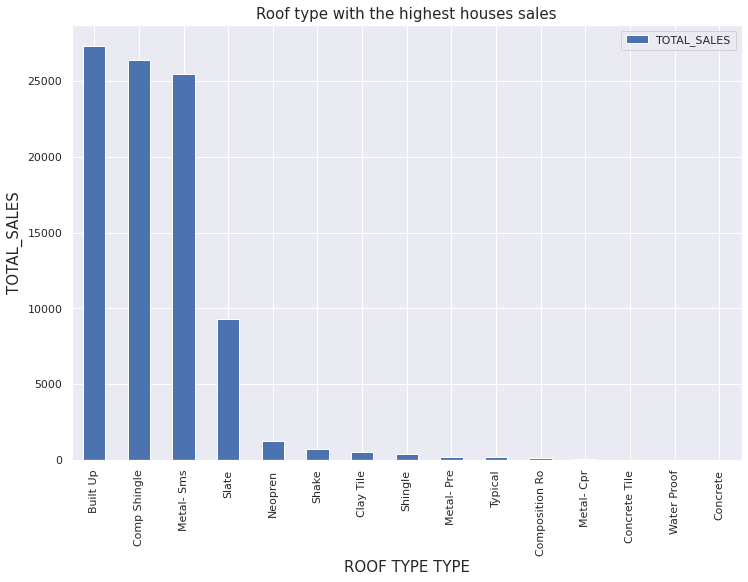

In [35]:
# Visualize the dataset

ax = df71.plot.bar(
    x="ROOF_D", 
    y="TOTAL_SALES",
    title= "Roof type with the highest houses sales",
    legend=True,
    figsize=(12,8),
  
)
ax.set_title("Roof type with the highest houses sales", fontsize=15)
ax.set_xlabel("ROOF TYPE TYPE", fontsize=15)
ax.set_ylabel("TOTAL_SALES", fontsize=15)

plt.show()

The four most common roof types are:
- Built up (29.7%)
- Comp Shingle (28.7%)
- Metal-sms (27.7%)
- Slate (10.1%)

### **4.6 Number of bathrooms**

In [36]:
df4 = df1.groupby('BATHRM').size().reset_index(name='Freq')
print (df4)

    BATHRM   Freq
0      0.0     34
1      1.0  28129
2      2.0  32974
3      3.0  20587
4      4.0   8086
5      5.0   1452
6      6.0    540
7      7.0    133
8      8.0     78
9      9.0     17
10    10.0     12
11    11.0      6
12    12.0      3
13    14.0      1
14    16.0      2
15    18.0      1
16    24.0      1


In [37]:
df41 = df1[["BATHRM","PRICE"]].groupby('BATHRM').agg(
    TOTAL_SALES=pd.NamedAgg("PRICE", "count"),
    MAX_PRICE=pd.NamedAgg("PRICE", "max"),
    MEAN_PRICE=pd.NamedAgg("PRICE", "mean")
)

df41=df41.sort_values(by="TOTAL_SALES", ascending=False)
df41=df41.reset_index()
df41=df41.head(17)

df41

,BATHRM,TOTAL_SALES,MAX_PRICE,MEAN_PRICE
0,2.0,32974,23960287.0,3.677312e+05
1,1.0,28129,23000000.0,2.002205e+05
2,3.0,20587,7295000.0,6.535507e+05
3,4.0,8086,25100000.0,7.874200e+05
4,5.0,1452,8750000.0,1.449545e+06
5,6.0,540,22000000.0,1.806879e+06
6,7.0,133,23000000.0,2.528250e+06
7,8.0,78,14000000.0,2.190593e+06
8,0.0,34,25000000.0,1.289277e+06
9,9.0,17,23960287.0,5.735303e+06


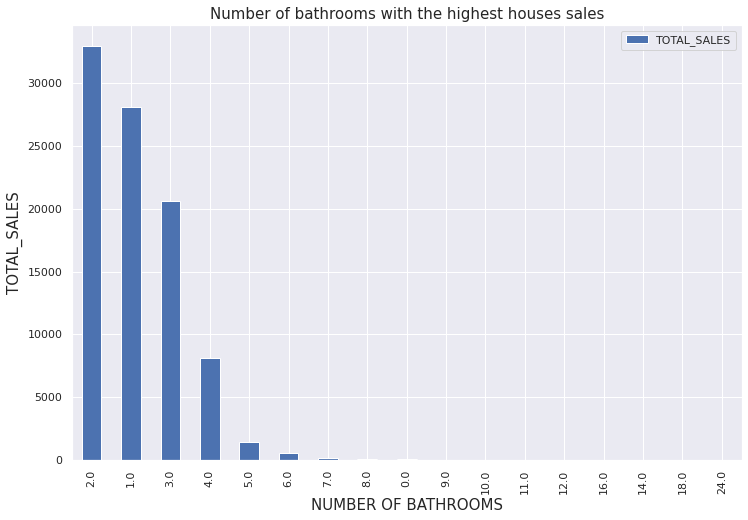

In [39]:
# Visualize the dataset

ax = df41.plot.bar(
    x="BATHRM", 
    y="TOTAL_SALES",
    title= "Number of bathrooms with the highest houses sales",
    legend=True,
    figsize=(12,8),
  
)
ax.set_title("Number of bathrooms with the highest houses sales", fontsize=15)
ax.set_xlabel("NUMBER OF BATHROOMS", fontsize=15)
ax.set_ylabel("TOTAL_SALES", fontsize=15)

plt.show()

Most of the houses have:
- 2 bathrooms (35.8%)
- 1 bathroom (30.6%)
- 3 bathrooms (22.4%)
- 4 bathrooms (8.8%)

One house has 24 bathrooms!

### **4.7 Number of rooms**

In [40]:
df11 = df1.groupby('ROOMS').size().reset_index(name='Freq')
print (df11)

    ROOMS   Freq
0     0.0    270
1     1.0     28
2     2.0     42
3     3.0    216
4     4.0   1767
5     5.0   7468
6     6.0  28898
7     7.0  18557
8     8.0  14649
9     9.0   6719
10   10.0   5552
11   11.0   2152
12   12.0   2663
13   13.0    705
14   14.0    536
15   15.0    274
16   16.0   1170
17   17.0     57
18   18.0    112
19   19.0     36
20   20.0    128
21   21.0     15
22   22.0      9
23   23.0      3
24   24.0      9
25   25.0      6
26   26.0      1
27   27.0      2
28   28.0      3
29   30.0      1
30   32.0      1
31   34.0      1
32   36.0      1
33   39.0      1
34   75.0      1
35   78.0      1
36   88.0      1
37  101.0      1


In [41]:
df111 = df1[["ROOMS","PRICE"]].groupby('ROOMS').agg(
    TOTAL_SALES=pd.NamedAgg("PRICE", "count"),
    MAX_PRICE=pd.NamedAgg("PRICE", "max"),
    MEAN_PRICE=pd.NamedAgg("PRICE", "mean")
)

df111=df111.sort_values(by="TOTAL_SALES", ascending=False)
df111=df111.reset_index()
df111=df111.head(17)

df111

,ROOMS,TOTAL_SALES,MAX_PRICE,MEAN_PRICE
0,6.0,28898,23960287.0,3.247797e+05
1,7.0,18557,6000000.0,3.817821e+05
2,8.0,14649,7295000.0,4.957379e+05
3,5.0,7468,25100000.0,2.857521e+05
4,9.0,6719,23960287.0,5.960934e+05
5,10.0,5552,6500000.0,7.248639e+05
6,12.0,2663,23000000.0,7.347891e+05
7,11.0,2152,9600000.0,8.653137e+05
8,4.0,1767,23000000.0,3.298507e+05
9,16.0,1170,17750000.0,5.026186e+05


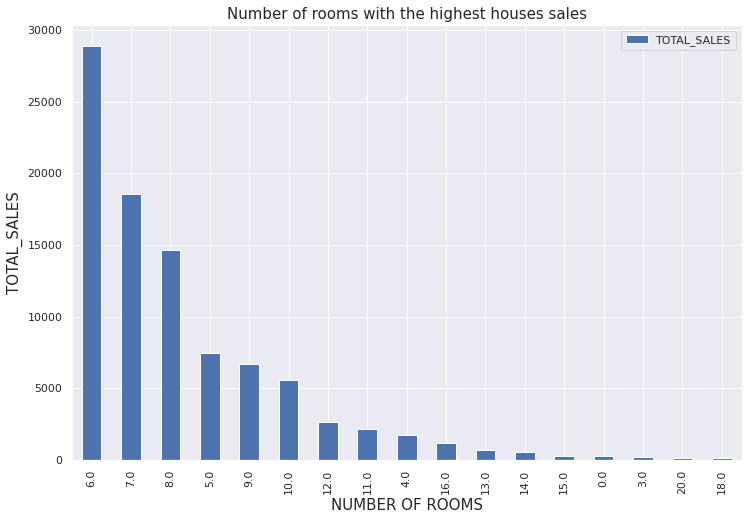

In [43]:
# Visualize the dataset

ax = df111.plot.bar(
    x="ROOMS", 
    y="TOTAL_SALES",
    title= "Number of rooms with the highest houses sales",
    legend=True,
    figsize=(12,8),
  
)
ax.set_title("Number of rooms with the highest houses sales", fontsize=15)
ax.set_xlabel("NUMBER OF ROOMS", fontsize=15)
ax.set_ylabel("TOTAL_SALES", fontsize=15)

plt.show()

The most common rooms numbers are:
- 6 rooms (31.4%)
- 7 rooms (20.2%)
- 8 rooms (15.9%)
- 5 rooms (8.1%)
- 9 rooms (7.3%)
- 10 rooms (6%)
- 12 rooms (2.9%)
- 11 rooms (2.3%)
- 16 rooms (1.3%)

### **4.8 Number of bedrooms**

In [44]:
df12 = df1.groupby('BEDRM').size().reset_index(name='Freq')
print (df12)

    BEDRM   Freq
0     0.0    120
1     1.0    312
2     2.0  12410
3     3.0  44477
4     4.0  23028
5     5.0   6959
6     6.0   3039
7     7.0    755
8     8.0    724
9     9.0    113
10   10.0     54
11   11.0     11
12   12.0     38
13   13.0      5
14   14.0      3
15   15.0      1
16   16.0      5
17   18.0      1
18   24.0      1


In [45]:
df121 = df1[["BEDRM","PRICE"]].groupby('BEDRM').agg(
    TOTAL_SALES=pd.NamedAgg("PRICE", "count"),
    MAX_PRICE=pd.NamedAgg("PRICE", "max"),
    MEAN_PRICE=pd.NamedAgg("PRICE", "mean")
)

df121=df121.sort_values(by="TOTAL_SALES", ascending=False)
df121=df121.reset_index()
df121=df121.head(17)

df121

,BEDRM,TOTAL_SALES,MAX_PRICE,MEAN_PRICE
0,3.0,44477,7576980.0,3.301287e+05
1,4.0,23028,23960287.0,5.338752e+05
2,2.0,12410,23960287.0,2.864636e+05
3,5.0,6959,11111111.0,8.478183e+05
4,6.0,3039,23000000.0,1.009205e+06
5,7.0,755,23960287.0,1.340219e+06
6,8.0,724,16500000.0,6.772858e+05
7,1.0,312,23000000.0,4.096727e+05
8,0.0,120,25100000.0,7.289822e+05
9,9.0,113,22000000.0,1.493811e+06


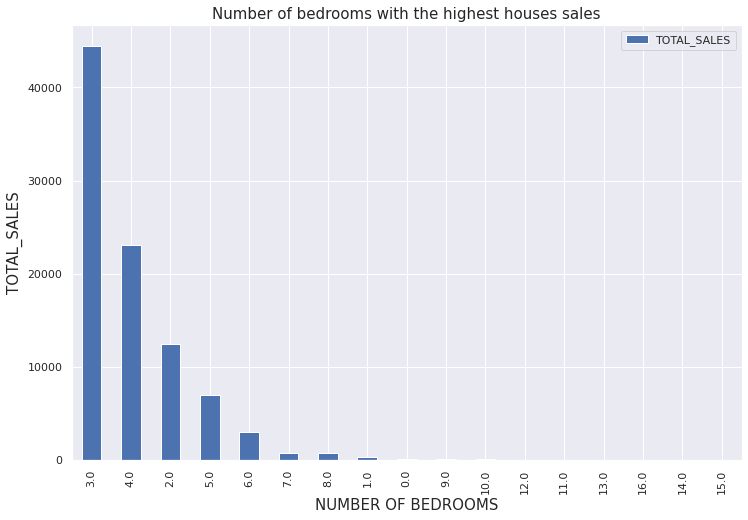

In [47]:
# Visualize the dataset

ax = df121.plot.bar(
    x="BEDRM", 
    y="TOTAL_SALES",
    title= "Number of bedrooms with the highest houses sales",
    legend=True,
    figsize=(12,8),
  
)
ax.set_title("Number of bedrooms with the highest houses sales", fontsize=15)
ax.set_xlabel("NUMBER OF BEDROOMS", fontsize=15)
ax.set_ylabel("TOTAL_SALES", fontsize=15)

plt.show()

The most common rooms numbers are:
- 3 bedrooms (48.3%)
- 4 bedrooms (25%)
- 2 bedrooms (13.5%)
- 5 bedrooms (7.6%)
- 6 bedrooms (3.3%)

### **4.9 Number of stories**

In [48]:
df13 = df1.groupby('STORIES').size().reset_index(name='Freq')
print (df13)

    STORIES   Freq
0      0.00     29
1      0.50      1
2      1.00   3763
3      1.20      2
4      1.25    355
5      1.50   1811
6      1.70      4
7      1.75    983
8      2.00  68070
9      2.20     10
10     2.25   1898
11     2.30      2
12     2.50   5467
13     2.70     22
14     2.75    430
15     3.00   8667
16     3.20      1
17     3.25     22
18     3.50    116
19     3.70      2
20     3.75     15
21     4.00    332
22     5.00     11
23     6.00      6
24     7.00      2
25     8.25      1
26     9.00     27
27    25.00      5
28    43.00      1
29   275.00      1


In [49]:
df131 = df1[["STORIES","PRICE"]].groupby('STORIES').agg(
    TOTAL_SALES=pd.NamedAgg("PRICE", "count"),
    MAX_PRICE=pd.NamedAgg("PRICE", "max"),
    MEAN_PRICE=pd.NamedAgg("PRICE", "mean")
)

df131=df131.sort_values(by="TOTAL_SALES", ascending=False)
df131=df131.reset_index()
df131=df131.head(17)

df131

,STORIES,TOTAL_SALES,MAX_PRICE,MEAN_PRICE
0,2.00,68070,23960287.0,3.871280e+05
1,3.00,8667,23000000.0,6.892650e+05
2,2.50,5467,22000000.0,8.029464e+05
3,1.00,3763,25100000.0,3.001508e+05
4,2.25,1898,13000000.0,5.910360e+05
5,1.50,1811,23000000.0,3.390686e+05
6,1.75,983,5450000.0,4.266741e+05
7,2.75,430,23960287.0,1.557652e+06
8,1.25,355,7295000.0,3.092643e+05
9,4.00,332,17750000.0,1.056084e+06


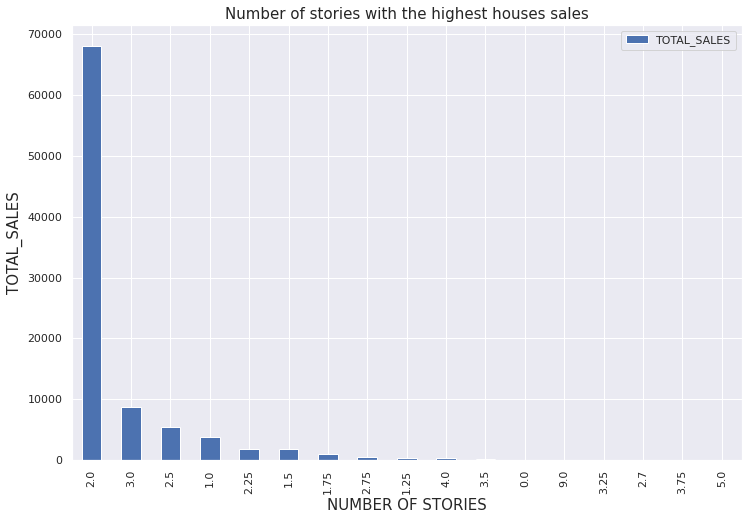

In [50]:
# Visualize the dataset

ax = df131.plot.bar(
    x="STORIES", 
    y="TOTAL_SALES",
    title= "Number of stories with the highest houses sales",
    legend=True,
    figsize=(12,8),
  
)
ax.set_title("Number of stories with the highest houses sales", fontsize=15)
ax.set_xlabel("NUMBER OF STORIES", fontsize=15)
ax.set_ylabel("TOTAL_SALES", fontsize=15)

plt.show()

The most common stories numbers are:
- 2 stories (73.9%)
- 3 stories (9.4%)
- 2.5 stories (5.9%)
- 1 story (4.1%)
- 1.5 stories (2%)

### **4.10 Sales frequency per year**

In [51]:
# Select the saledate and price columns

df14=df1[['SSL','SALEDATE','PRICE']]
df14.head()

,SSL,SALEDATE,PRICE
0,0028 0820,2021/09/03 00:00:00+00,1225000.0
1,0028 0821,2019/09/05 00:00:00+00,882500.0
2,0028 0829,2005/01/12 00:00:00+00,1250000.0
3,0028 0850,2011/03/25 00:00:00+00,0.0
4,0028 0854,2021/11/03 00:00:00+00,780000.0


In [52]:
# Select the year and the month from the saledate column

df14['YEAR'] = pd.DatetimeIndex(df14['SALEDATE']).year
df14['MONTHS'] = pd.DatetimeIndex(df14['SALEDATE']).month



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [53]:
df14.head()

,SSL,SALEDATE,PRICE,YEAR,MONTHS
0,0028 0820,2021/09/03 00:00:00+00,1225000.0,2021,9
1,0028 0821,2019/09/05 00:00:00+00,882500.0,2019,9
2,0028 0829,2005/01/12 00:00:00+00,1250000.0,2005,1
3,0028 0850,2011/03/25 00:00:00+00,0.0,2011,3
4,0028 0854,2021/11/03 00:00:00+00,780000.0,2021,11


In [54]:
# Group the sales by year and count the total of sales, the maximum price and the mean
# Rank the years by the total count

df15 = df14[["YEAR","PRICE"]].groupby('YEAR').agg(
    TOTAL_SALES=pd.NamedAgg("PRICE", "count"),
    MAX_PRICE=pd.NamedAgg("PRICE", "max"),
    MEAN_PRICE=pd.NamedAgg("PRICE", "mean")
)

df15=df15.sort_values(by="TOTAL_SALES", ascending=False)
df15=df15.reset_index()
df15=df15.head(15)

df15

,YEAR,TOTAL_SALES,MAX_PRICE,MEAN_PRICE
0,2021,8935,13000000.0,726258.389368
1,2020,6650,17750000.0,670103.809774
2,2019,5857,8750000.0,624484.890388
3,2018,5452,25100000.0,612418.802274
4,2017,5051,14000000.0,589815.812512
5,2016,4367,23000000.0,556959.179070
6,2015,3900,18000000.0,529902.865897
7,2014,3605,16100000.0,503285.433564
8,2013,3553,8600000.0,472111.170279
9,1900,3362,48000.0,14.277216


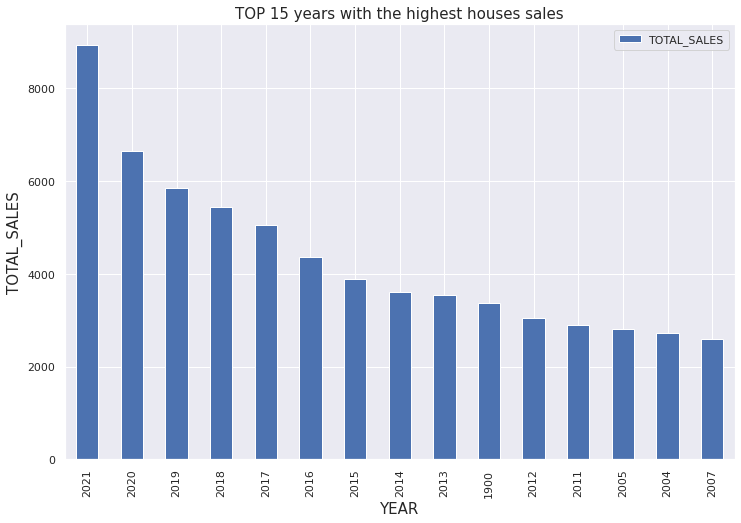

In [55]:
# Visualize the dataset

ax = df15.plot.bar(
    x="YEAR", 
    y="TOTAL_SALES",
    title= "TOP 15 years with the highest houses sales",
    legend=True,
    figsize=(12,8),
  
)
ax.set_title("TOP 15 years with the highest houses sales", fontsize=15)
ax.set_xlabel("YEAR", fontsize=15)
ax.set_ylabel("TOTAL_SALES", fontsize=15)

plt.show()

In [62]:
# Group the sales by year and count the total of sales, the maximum price and the mean
# Rank by the years

df35 = df14[["YEAR","PRICE"]].groupby('YEAR').agg(
    TOTAL_SALES=pd.NamedAgg("PRICE", "count"),
    MAX_PRICE=pd.NamedAgg("PRICE", "max"),
    MEAN_PRICE=pd.NamedAgg("PRICE", "mean")
)

df35=df35.sort_values(by="YEAR", ascending=False)
df35=df35.reset_index()
df35=df35.head(15)

df35

,YEAR,TOTAL_SALES,MAX_PRICE,MEAN_PRICE
0,2022,932,9400000.0,590299.512876
1,2021,8935,13000000.0,726258.389368
2,2020,6650,17750000.0,670103.809774
3,2019,5857,8750000.0,624484.890388
4,2018,5452,25100000.0,612418.802274
5,2017,5051,14000000.0,589815.812512
6,2016,4367,23000000.0,556959.179070
7,2015,3900,18000000.0,529902.865897
8,2014,3605,16100000.0,503285.433564
9,2013,3553,8600000.0,472111.170279


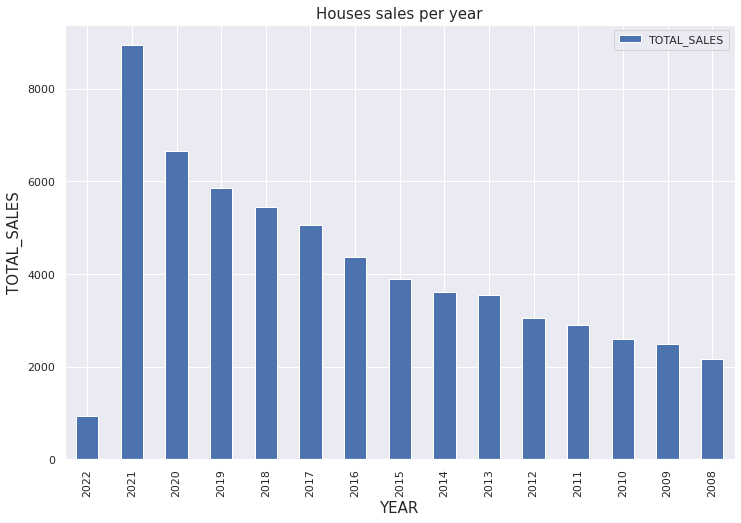

In [63]:
# Visualize the dataset

ax = df35.plot.bar(
    x="YEAR", 
    y="TOTAL_SALES",
    title= "Houses sales per year",
    legend=True,
    figsize=(12,8),
  
)
ax.set_title("Houses sales per year", fontsize=15)
ax.set_xlabel("YEAR", fontsize=15)
ax.set_ylabel("TOTAL_SALES", fontsize=15)

plt.show()

- 2014-2015: +8,2%
- 2015-2016: +12%
- 2016-2017: +15,7%
- 2017-2018: +7,9%
- 2018-2019: +7,4%
- 2019-2020: +13,5%
- 2020-2021: +34,4%

In 2021, the number of houses sold increased by 34,4% as compared to 2020. The COVID-19 may be a valid explanation.


In [56]:
# Rank the years by the maximum price

df16 = df14[["YEAR","PRICE"]].groupby('YEAR').agg(
    TOTAL_SALES=pd.NamedAgg("PRICE", "count"),
    MAX_PRICE=pd.NamedAgg("PRICE", "max"),
    MEAN_PRICE=pd.NamedAgg("PRICE", "mean")
)
df16=df16.reset_index()
df16=df16.sort_values(by="MAX_PRICE", ascending=False)
df16=df16.head(15)
df16

,YEAR,TOTAL_SALES,MAX_PRICE,MEAN_PRICE
62,2018,5452,25100000.0,612418.802274
51,2007,2600,23960287.0,391549.655000
60,2016,4367,23000000.0,556959.179070
55,2011,2897,22000000.0,393264.848809
59,2015,3900,18000000.0,529902.865897
64,2020,6650,17750000.0,670103.809774
58,2014,3605,16100000.0,503285.433564
50,2006,2508,15000000.0,345881.214514
61,2017,5051,14000000.0,589815.812512
65,2021,8935,13000000.0,726258.389368


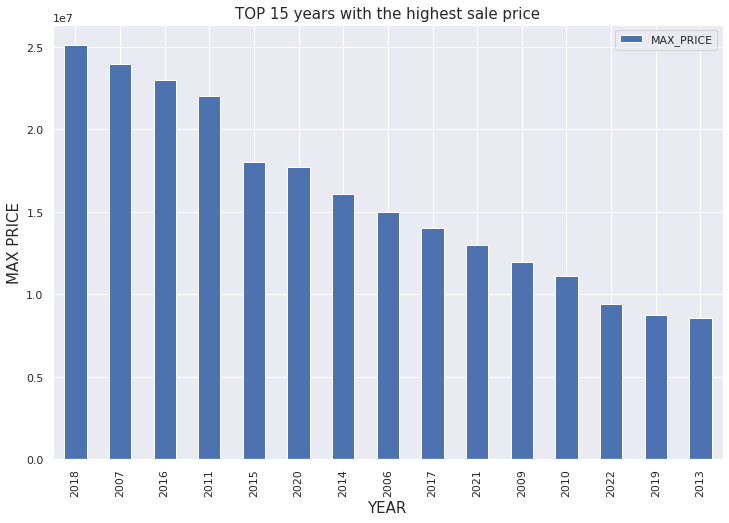

In [58]:
# Visualize the dataset

ax = df16.plot.bar(
    x="YEAR", 
    y="MAX_PRICE",
    title= "TOP 15 years with the highest sale price",
    legend=True,
    figsize=(12,8),
  
)
ax.set_title("TOP 15 years with the highest sale price", fontsize=15)
ax.set_xlabel("YEAR", fontsize=15)
ax.set_ylabel("MAX PRICE", fontsize=15)

plt.show()

### **4.11 Sales frequency per months**

In [59]:
# Group the sales by year and count the total of sales, the maximum price and the mean
# Rank the years by the total count

df17 = df14[["MONTHS","PRICE"]].groupby('MONTHS').agg(
    TOTAL_SALES=pd.NamedAgg("PRICE", "count"),
    MAX_PRICE=pd.NamedAgg("PRICE", "max"),
    MEAN_PRICE=pd.NamedAgg("PRICE", "mean")
)

df17=df17.sort_values(by="TOTAL_SALES", ascending=False)
df17=df17.reset_index()
df17=df17.head(15)

df17

,MONTHS,TOTAL_SALES,MAX_PRICE,MEAN_PRICE
0,1,10294,12000000.0,287274.824169
1,7,8217,22000000.0,528652.567725
2,6,8062,8450000.0,511479.653064
3,12,7971,18000000.0,474454.701292
4,8,7907,13000000.0,478353.679777
5,10,7769,23000000.0,458819.153044
6,5,7542,23960287.0,498808.178600
7,11,7313,16500000.0,482492.716669
8,4,7109,25000000.0,441355.829231
9,9,7098,7950000.0,443439.026486


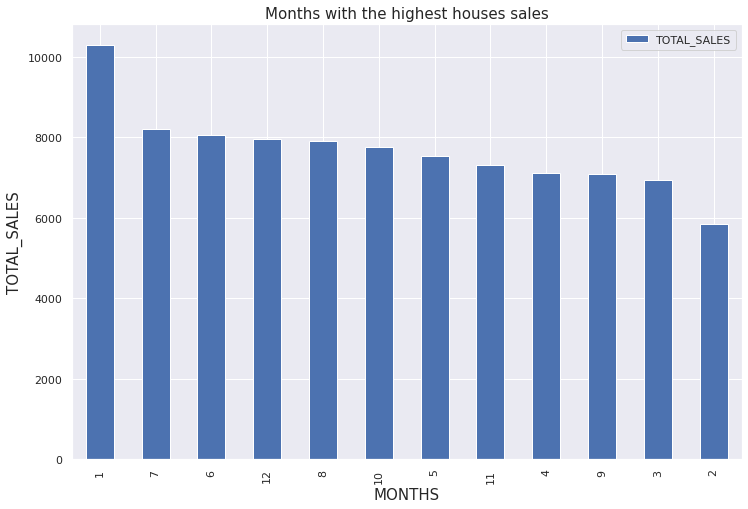

In [61]:
# Visualize the dataset

ax = df17.plot.bar(
    x="MONTHS", 
    y="TOTAL_SALES",
    title= "Months with the highest houses sales",
    legend=True,
    figsize=(12,8),
  
)
ax.set_title("Months with the highest houses sales", fontsize=15)
ax.set_xlabel("MONTHS", fontsize=15)
ax.set_ylabel("TOTAL_SALES", fontsize=15)

plt.show()

Top months: January, July, June, Decemeber, August

## **5. General Statistics**

In [14]:
df1[['BATHRM', 'ROOMS','BEDRM','STORIES','PRICE','GBA']].describe()

,BATHRM,ROOMS,BEDRM,STORIES,PRICE,GBA
count,92056.000000,92056.000000,92056.000000,92056.000000,9.205600e+04,92056.000000
mean,2.180195,7.436984,3.445283,2.092990,4.501493e+05,1742.567394
std,1.091695,2.376556,1.131678,1.023036,6.556871e+05,850.547849
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1.000000,6.000000,3.000000,2.000000,0.000000e+00,1216.000000
50%,2.000000,7.000000,3.000000,2.000000,2.850000e+05,1512.000000
75%,3.000000,8.000000,4.000000,2.000000,6.990000e+05,2013.000000
max,24.000000,101.000000,24.000000,275.000000,2.510000e+07,24030.000000


In [15]:
df1[['BATHRM', 'ROOMS','BEDRM','STORIES','PRICE','GBA']].median()

BATHRM          2.0
ROOMS           7.0
BEDRM           3.0
STORIES         2.0
PRICE      285000.0
GBA          1512.0
dtype: float64

# **Second dataset**

In [17]:
# Read the second dataset

df6 = pd.read_csv("address.csv")
df6=df6[['SSL','FULLADDRESS']]
df6.head()

,SSL,FULLADDRESS
0,5671 2022,2017 37TH STREET SE
1,5671 2023,2017 37TH STREET SE
2,5671 2024,2017 37TH STREET SE
3,5671 2025,2017 37TH STREET SE
4,5671 2026,2017 37TH STREET SE


In [18]:
df6.shape

(272579, 2)

In [19]:
# remove all the rows that contain a missing value
df6 = df6.dropna()
df6.shape

(62495, 2)

# **Merge the two datasets**

In [20]:
# Combining the two files
                        
final= pd.merge(df1,df6, on ='SSL')
final.head()

,SSL,BATHRM,HEAT,HEAT_D,ROOMS,BEDRM,STORIES,SALEDATE,PRICE,GBA,STRUCT,STRUCT_D,GRADE,GRADE_D,CNDTN,CNDTN_D,EXTWALL,EXTWALL_D,ROOF,ROOF_D,INTWALL,INTWALL_D,FULLADDRESS
0,1043 6054,3.0,1.0,Forced Air,6.0,3.0,4.0,2021/03/25 00:00:00+00,1285000.0,2139,7.0,Row Inside,5.0,Good Quality,6.0,Excellent,15.0,Face Brick,3.0,Shingle,6.0,Hardwood,1309 E STREET SE
1,1043 6055,3.0,1.0,Forced Air,6.0,3.0,4.0,2021/04/30 00:00:00+00,1275000.0,2139,7.0,Row Inside,5.0,Good Quality,6.0,Excellent,15.0,Face Brick,3.0,Shingle,6.0,Hardwood,1309 E STREET SE
2,1043 6057,3.0,1.0,Forced Air,7.0,3.0,4.0,2021/12/15 00:00:00+00,1401300.0,2448,7.0,Row Inside,5.0,Good Quality,6.0,Excellent,15.0,Face Brick,3.0,Shingle,6.0,Hardwood,1309 E STREET SE
3,1043 6058,3.0,1.0,Forced Air,7.0,3.0,4.0,1900/01/01 00:00:00+00,0.0,2448,7.0,Row Inside,5.0,Good Quality,6.0,Excellent,15.0,Face Brick,3.0,Shingle,6.0,Hardwood,1309 E STREET SE
4,1043 6059,3.0,1.0,Forced Air,8.0,3.0,4.0,2021/07/13 00:00:00+00,1150000.0,2354,7.0,Row Inside,5.0,Good Quality,6.0,Excellent,15.0,Face Brick,3.0,Shingle,6.0,Hardwood,1309 E STREET SE


In [21]:
final.shape

(19, 23)

Only 19 houses have their addresses in the second dataset

## **Correlation Matrix**

In [123]:
df_final=df1[['BATHRM','HEAT','ROOMS','BEDRM','STORIES','GBA','STRUCT','EXTWALL','ROOF','INTWALL','PRICE']]
df_final.head()

,BATHRM,HEAT,ROOMS,BEDRM,STORIES,GBA,STRUCT,EXTWALL,ROOF,INTWALL,PRICE
0,2.0,13.0,8.0,4.0,2.0,1742,7.0,14.0,2.0,6.0,1225000.0
1,1.0,8.0,6.0,3.0,2.0,1132,7.0,14.0,2.0,6.0,882500.0
2,3.0,8.0,10.0,4.0,3.0,2284,6.0,14.0,2.0,6.0,1250000.0
3,1.0,1.0,4.0,2.0,2.0,702,6.0,14.0,2.0,6.0,0.0
4,2.0,7.0,6.0,2.0,2.0,648,7.0,14.0,2.0,6.0,780000.0


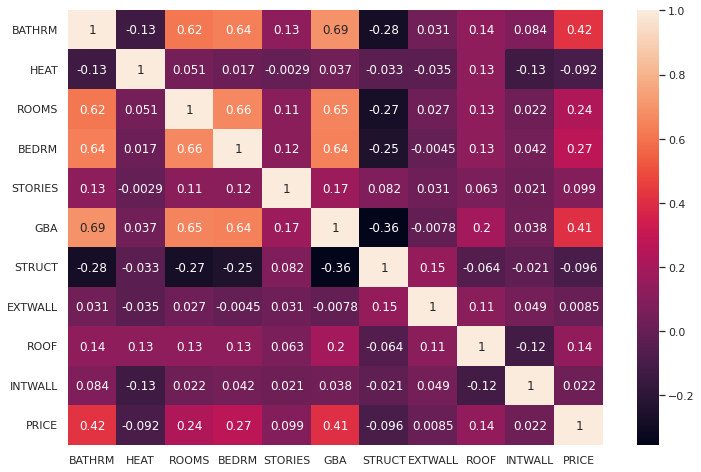

In [125]:
corr_matrix = df_final.corr()
# Plot the correlation with seaborn
plt.subplots(figsize = (12, 8))
sns.heatmap(corr_matrix, annot = True)
plt.show()

The variables that are more correlated to the price are:

- Gross Building Area (GBA) (0.41)
- Number of bathrooms (0.42)
- Number of bedrooms (0.27)
- Number of rooms (0.24)
- Roof type (0.14)